In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         76           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        106           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        852           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        171           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1816           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14017           False  
house-pr

In [ ]:
!kaggle competitions download -c sberbank-russian-housing-market -p kaggle/

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 27.9MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 47.9MB/s]
  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 65.0MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 20.6MB/s]
 82% 14.0M/17.1M [00:00<00:00, 64.3MB/s]
100% 17.1M/17.1M [00:00<00:00, 63.8MB/s]


In [ ]:
!unzip /content/kaggle/test.csv.zip
!unzip /content/kaggle/train.csv.zip
!unzip /content/kaggle/macro.csv.zip
!unzip /content/kaggle/sample_submission.csv.zip


Archive:  /content/kaggle/test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
Archive:  /content/kaggle/train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    
Archive:  /content/kaggle/macro.csv.zip
  inflating: macro.csv               
Archive:  /content/kaggle/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test =  pd.read_csv ('/content/test.csv' )
train =  pd.read_csv ('/content/train.csv' )
macro =  pd.read_csv ('/content/macro.csv' )
sample_submission =  pd.read_csv ('/content/sample_submission.csv' )

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


Из инфо видно, что у нас 16 категориональных признаков, остальные числовые. 
Проанализируем количетво нулевых строк в датасете

Часть 1. Анализ Данных работа с данными

In [ ]:
null_train = train.isna().sum().reset_index()

In [ ]:
null_train[null_train[0] > 6000]

,index,0
3,life_sq,6383
5,max_floor,9572
6,material,9572
7,build_year,13605
8,num_room,9572
9,kitch_sq,9572
10,state,13559
18,preschool_quota,6688
21,school_quota,6685
24,hospital_beds_raion,14441


Уберем признаки имеющие меньшую значимость и много отсутствующих данных 

In [ ]:
drop_column = ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
               'cafe_avg_price_500', 'cafe_sum_1000_min_price_avg', 
               'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000',
               'hospital_beds_raion']

In [ ]:
train_new = train.copy()
test_new = test.copy()

In [ ]:
train_new = train_new.drop(drop_column, axis = 1)
test_new = test_new.drop(drop_column, axis = 1)

In [ ]:
train_new.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,30471.000000,30471.000000,23786.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,...,29480.000000,29480.000000,29480.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30293.000000,30471.000000,3.047100e+04,30471.000000,3.047100e+04,30471.000000,30174.000000,30174.000000,30174.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,3271.272464,4.065111,5354.269699,8324.970739,4.705031,0.109678,1.320895,0.138295,6.635030,2.896393,0.286732,4.200978,8.253454,1.463062e+05,67207.789603,79098.662105,11178.809491,5723.853106,5455.013948,53667.908897,27253.585803,26414.414821,19209.707164,5811.618162,13398.167438,...,765.900619,1283.334756,1024.617808,7.274622,27.782055,30.450297,26.685078,13.320108,4.646516,0.707131,6.122674,12.287979,0.199075,3.876440,20.239310,2.319944,22.769557,10.348669,71.356240,1.401057e+06,30.131863,1.173871e+06,265.528470,765.098467,1278.280635,1021.689513,17.806898,66.195530,73.442421,63.469660,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,2169.759592,2.993795,3989.640917,4289.734174,3.445105,0.333328,1.492903,0.443796,6.571982,3.290058,1.510491,4.741812,23.536953,2.830251e+05,129444.557322,153630.894568,8287.957623,4275.438364,4020.546283,37483.559701,18939.154637,18643.132758,13174.721197,4073.828409,9144.326481,...,224.006719,353.299663,288.163451,18.242400,71.826492,69.528682,70.855732,41.282000,16.884524,2.775499,15.413697,25.785241,0.447815,13.188748,18.843867,2.271539,11.208471,5.668748,155.341362,2.303052e+06

In [ ]:
train_new.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6407578.100,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9589336.912,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4808269.831,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000


Дата в неудобном формате, введем допущение, что будем рассматривать только год

In [ ]:
from datetime import datetime

In [ ]:
train_new['timestamp'] = pd.to_datetime(train_new['timestamp'])
test_new['timestamp'] = pd.to_datetime(test_new['timestamp'])
train_new['timestamp'] = train_new['timestamp'].dt.year
test_new['timestamp'] = test_new['timestamp'].dt.year

In [ ]:
train_new.head(3)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6407578.100,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9589336.912,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4808269.831,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000


In [ ]:
import matplotlib.pyplot as plt

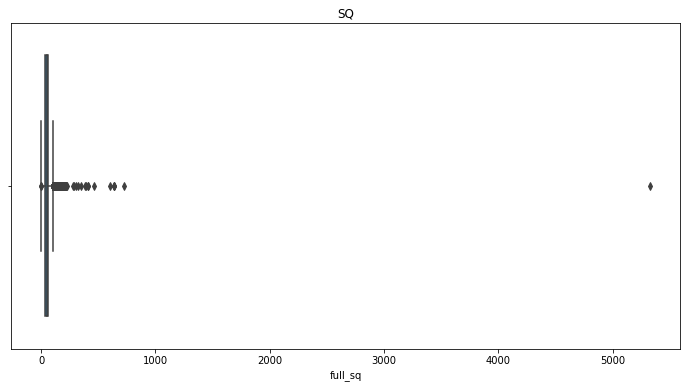

In [ ]:
#Площадь самая выжная фича, посмотрим выбросы и избависмся от них
plt.figure(figsize=(12,6))
sns.boxplot(x = train_new['full_sq'])
plt.title("SQ")
plt.show()

Удалим выбросы

In [ ]:
train_new = train_new[(train_new['full_sq'] > 0) & (train_new['full_sq'] < 500)]

In [ ]:
#Посмотрим на данные по таргету
np.sort(train_new['price_doc'].unique())[:20]

array([100000, 190000, 200000, 260000, 300000, 301693, 331464, 338570,
       340000, 354289, 360000, 395685, 410000, 472249, 476902, 500000,
       550000, 550637, 551750, 552312])

Так как первые значения маленькие имеет смысл посмотреть на распределение таргета (в логарифмической шкале, так как в числовой шкале я посмотрел и получается большой хвост)

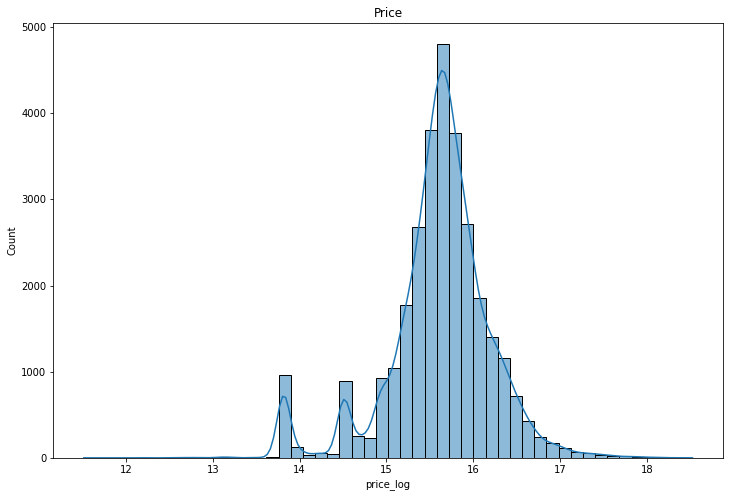

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(np.log(train_new['price_doc']), bins=50, kde=True)
plt.xlabel('price_log')
plt.title('Price')
plt.show()

In [ ]:
up_lim = np.percentile(train_new['price_doc'], 99)
low_lim = np.percentile(train_new['price_doc'], 2)
train_new = train_new[(train_new['price_doc'] > low_lim) & (train_new['price_doc'] < up_lim)]

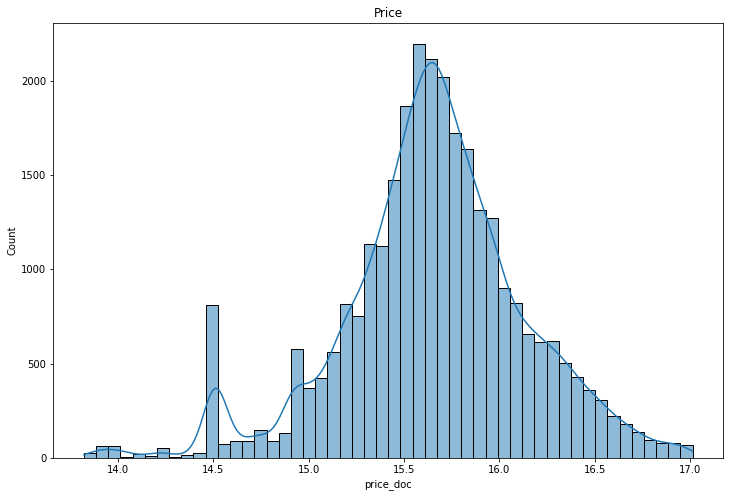

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(np.log(train_new['price_doc']), bins=50, kde=True)
plt.title('price_log')
plt.title('Price')
plt.show()

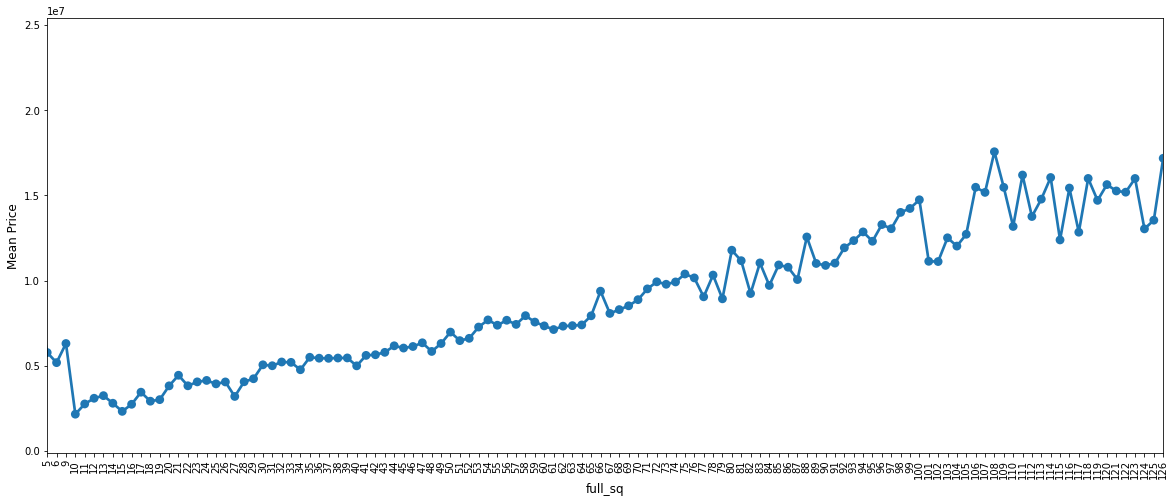

In [ ]:
#Построим график записимости площади от стоимости
price_sq = train_new.groupby(['full_sq'])['price_doc'].aggregate(np.mean).reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(x='full_sq', y='price_doc', data=price_sq)
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('full_sq', fontsize=12)
plt.xticks(rotation='vertical')
plt.xlim(1,120)
plt.show()

Из графика видна линейная зависимость цены от площади (что очень логично)
дальнейший анализ категориональных фич я буду проводить не по цене, а по цене за квадратный метр. При обучении модели данная фича будет удалена. 

In [ ]:
train_new['price_sq'] = round(train_new['price_doc'] / train_new['full_sq'],1)

In [ ]:
train_new.select_dtypes(include='object')

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
30466,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30468,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [ ]:
cat_features = ['product_type','sub_area','culture_objects_top_25', 'thermal_power_plant_raion',
                             'incineration_raion', 'oil_chemistry_raion', 
                             'radiation_raion', 'railroad_terminal_raion', 
                             'big_market_raion', 'nuclear_reactor_raion',
                             'detention_facility_raion', 'water_1line', 
                              'big_road1_1line', 'railroad_1line', 'ecology']

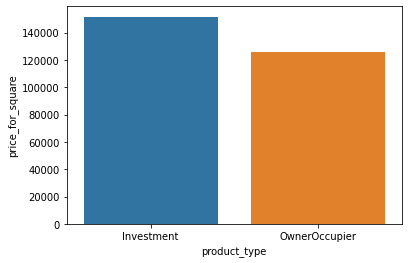

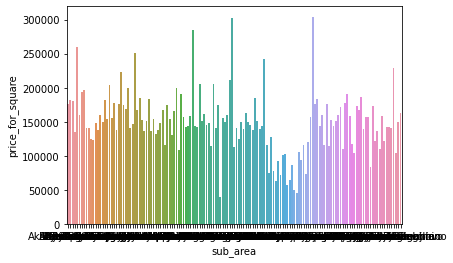

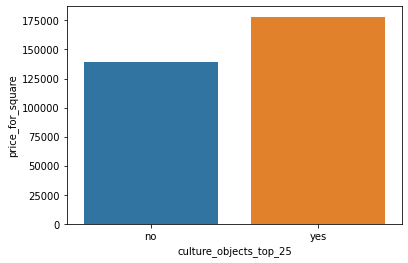

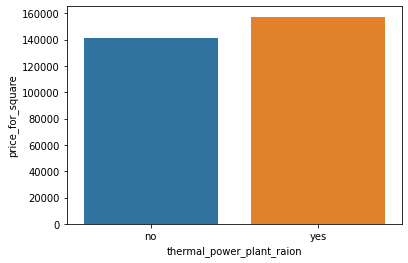

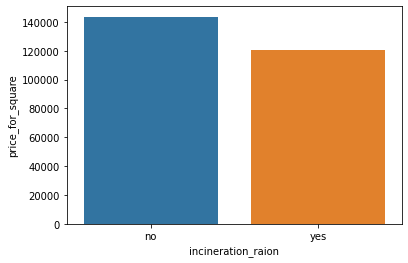

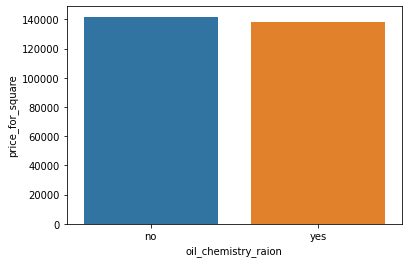

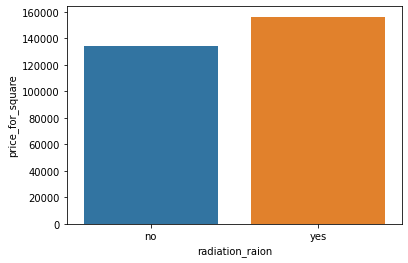

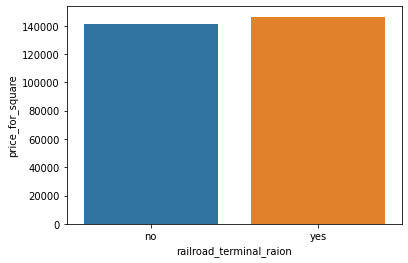

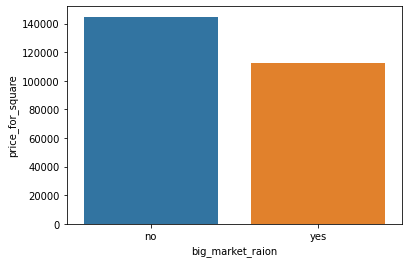

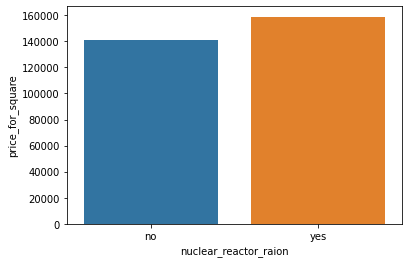

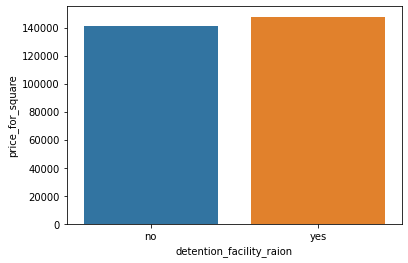

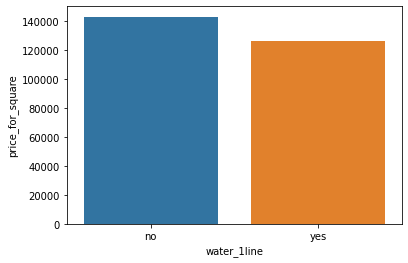

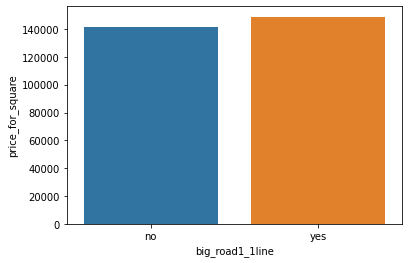

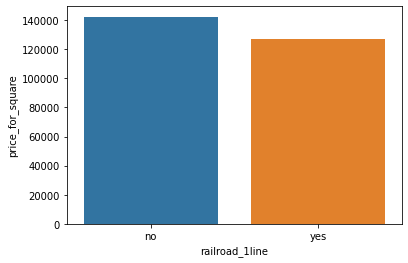

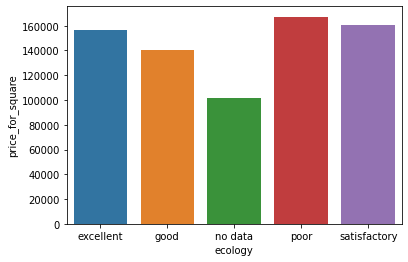

In [ ]:
for feat in cat_features:
    loc_df = train_new.groupby(feat)['price_sq'].aggregate(np.mean).reset_index()
    sns.barplot(x = loc_df[feat], y = loc_df['price_sq'])
    plt.xlabel(feat)
    plt.ylabel('price_for_square')
    plt.show()

Из графиков видны нелогичные категориальные фичи, стоит их убрать 

In [ ]:
drop_columns_new = [ 'radiation_raion',  'nuclear_reactor_raion', 'ecology']

In [ ]:
train_new = train_new.drop(drop_columns_new, axis = 1)
test_new = test_new.drop(drop_columns_new, axis = 1)

In [ ]:
# Оставим категориональные фичи 
cat_features = ['product_type','sub_area','culture_objects_top_25', 'thermal_power_plant_raion',
                             'incineration_raion', 'oil_chemistry_raion', 'railroad_terminal_raion', 
                             'big_market_raion', 
                             'detention_facility_raion', 'water_1line', 
                              'big_road1_1line', 'railroad_1line']

In [ ]:
#Посмотрим на самую главную фичу по Москве
train_new['metro_km_walk'] = round(train_new['metro_km_walk'], 2)

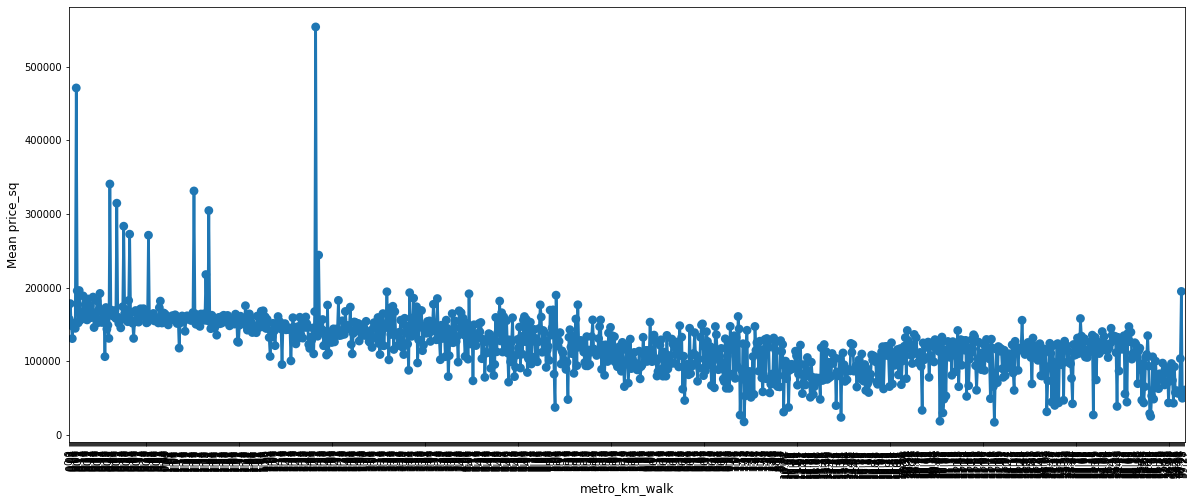

In [ ]:
#Построим график 
price_km = train_new.groupby(['metro_km_walk'])['price_sq'].aggregate(np.mean).reset_index()
plt.figure(figsize=(20,8))
sns.pointplot(x='metro_km_walk', y='price_sq', data=price_km)
plt.ylabel('Mean price_sq', fontsize=12)
plt.xlabel('metro_km_walk', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()
#Тоже есть линейная зависимость чем ближе к метро тем цена за квадратный метр дороже.

In [ ]:
train_new = train_new.drop(['price_sq'], axis = 1)

Часть 2. Разбиение модели на train и val  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_new.drop(['price_doc'], axis = 1)

In [ ]:
Y = train_new['price_doc']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=0) 

часть 3. Обучение модели. Для обучения модели я оставил только catboost, 
так как он показал лучший результат и автоматически переводит
 категориональне признаки что тоже удобно 

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 46 kB/s 
     |████████████████████████████████| 564 kB 49.9 MB/s 


In [ ]:
import catboost
import shap
import sklearn.model_selection
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
a = train_new.select_dtypes(include='float64').columns.to_list()
b = test_new.select_dtypes(include='float64').columns.to_list()
list(set(a)-set(b))

['floor', 'num_room', 'max_floor', 'material']

In [ ]:
test_new['product_type'] = test_new['product_type'].fillna('missing')

In [ ]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 281 entries, id to market_count_5000
dtypes: float64(109), int64(160), object(12)
memory usage: 16.4+ MB


In [ ]:
train_new = train_new.set_index('id')
test_new = test_new.set_index('id')

In [ ]:
train_pool = catboost.Pool(
    x_train,
    label=y_train,
    cat_features=cat_features)
test_pool = catboost.Pool(
    x_val,
    label=y_val,
    cat_features=cat_features
)
test_p = catboost.Pool(test_new, cat_features=cat_features)

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catboost_sber_price = 'sber_price'
clf = catboost.CatBoostRegressor(iterations= 400, 
    depth = 10,
    eval_metric='RMSE',
    od_pval=0.1,
    od_wait=30,
    random_seed=52,
    train_dir=catboost_sber_price,
    task_type='CPU',
    use_best_model=True
)
clf.fit(
    train_pool, 
    eval_set=test_pool
)

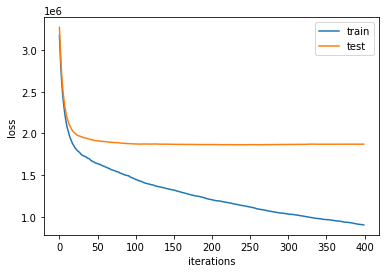

In [ ]:
hist = clf.get_evals_result()
plt.plot(list(hist['learn'].values())[0], label= 'train')
plt.plot(list(hist['validation'].values())[0], label = 'test')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [ ]:
res = clf.predict(test_p)
res = pd.Series(res, name = 'price_doc')

In [ ]:
final_result = pd.concat([test['id'], res], axis=1)

In [ ]:
final_result.to_csv('sample_submission_catboost_11.csv', index = False)

Часть 4. Финальный анализ признаков

In [ ]:
sorted(
    zip(x_train.columns, clf.feature_importances_), 
    key=lambda p: p[1], 
    reverse=True
)

Как и ожидалось фича площадь имеет самый высокий вес, далее идут год постройки, этаж, жилая площадь. Думал, что расстояние до метро будет иметь высокий вес, но помоему фичи связанные с метро недооценены 